Course Name: Pattern Recognition Lab
Course No : CSE 4214
Experiment Name: Designing a Minimum Distance to Class Mean Classifier
Name: Md. Reasad Zaman Chowdhury
Section: A1
Student ID: 160104004

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Reading training and testing dataset
df_train = pd.read_csv('train.txt', sep=" " ,  header = None, dtype = 'Int64')
df_test = pd.read_csv('test.txt', sep=" " ,  header = None, dtype = 'Int64')

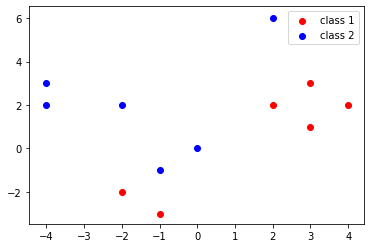

In [3]:
#slicing the features and labels from training samples
x = np.array(df_train[0])
y = np.array(df_train[1])
label = np.array(df_train[2])

cdict = {1: 'red', 2: 'blue'}

#scatter plot according to the class label
fig, ax = plt.subplots()
for g in np.unique(label):
    ix = np.where(label == g)
    ax.scatter(x[ix], y[ix], c = cdict[g], label = 'class '+str(g))
ax.legend()
plt.show()


In [4]:
#splitting 2 classes from dataframe
w1 = np.array(df_train[df_train[2] == 1])
w2 = np.array(df_train[df_train[2] == 2])

#calculating mean of 2 classes
u1 = np.array( [np.mean(w1[:,0]) , np.mean(w1[:,1])] )
u2 = np.array( [np.mean(w2[:,0]) , np.mean(w2[:,1])] )

#slicing unknown data from trainning samples 
x_test = np.array(df_test.iloc[:,0:2])
true_label = df_test.iloc[:,2]
predicted = []

#calculate linear Discriminant Function for test samples
for xi in x_test:
    g1 = np.dot( np.transpose(u1) , xi) - 0.5 * np.dot(np.transpose(u1) , u1)
    g2 = np.dot( np.transpose(u2) , xi) - 0.5 * np.dot(np.transpose(u2) , u2)
    
    if g1 > g2:
        predicted.append(1)
    else:
        predicted.append(2)

#marging the predicted class labels with the testing samples
df_test[3] = predicted

print(df_test)

    0   1  2  3
0  -1  -5  1  1
1   3   2  1  1
2  -2   1  2  2
3   8   2  1  1
4   6  -1  1  1
5   0   2  1  2
6  -3   0  2  2


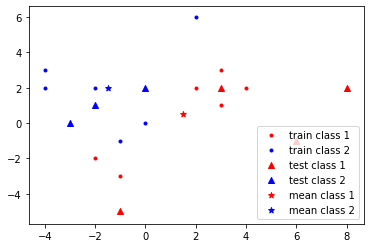

In [5]:
#ploting the traing and testing data points
#scatter plot according to the class label

fig, ax = plt.subplots()

for g in np.unique(label):
    ix = np.where(label == g)
    ax.scatter(x[ix], y[ix], marker='.', c = cdict[g], label = 'train class '+str(g))    

for g in np.unique(predicted):
    ix = np.where(predicted == g)
    ax.scatter(x_test[ix,0], x_test[ix,1], marker='^', c = cdict[g], label = 'test class '+str(g))

ax.scatter(u1[0], u1[1], marker='*', c = 'r', label = 'mean class 1') 
ax.scatter(u2[0], u2[1], marker='*', c = 'b', label = 'mean class 2') 

ax.legend(loc='lower right')
plt.show()


In [6]:
#Decision Boundary

m = np.transpose(u1) - np.transpose(u2)
m1 = m[0]
m2 = m[1]

c = 0.5 * ( np.dot(np.transpose(u1), u1) - np.dot(np.transpose(u2) , u2) )

x_db = []
y_db = []

for xi in range(-6, 9):
    yi = - (m1 * xi + c) / m2
    y_db.append(yi)
    x_db.append(xi)


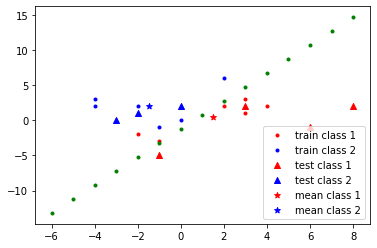

In [7]:
#ploting the traing and testing data points along with the decision boundary


fig, ax = plt.subplots()

for g in np.unique(label):
    ix = np.where(label == g)
    ax.scatter(x[ix], y[ix], marker='.', c = cdict[g], label = 'train class '+str(g))    

for g in np.unique(predicted):
    ix = np.where(predicted == g)
    ax.scatter(x_test[ix,0], x_test[ix,1], marker='^', c = cdict[g], label = 'test class '+str(g))

ax.scatter(u1[0], u1[1], marker='*', c = 'r', label = 'mean class 1') 
ax.scatter(u2[0], u2[1], marker='*', c = 'b', label = 'mean class 2') 

ax.scatter(x_db, y_db, marker='.', c = 'g') 

ax.legend(loc='lower right')
plt.show()


In [9]:
#Printing the accuracy
accuracy = ( len(true_label[true_label == predicted]) / len(true_label) ) * 100
print("Accuracy:",accuracy)

Accuracy: 85.71428571428571
